# Wave propagation Method (WPM)

In [23]:
from diffractio import np, sp, plt
from diffractio import nm, um, mm, degrees
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X


## XZ Scheme

In [24]:
x0 = np.linspace(-400 * um, 400 * um, 1024 * 2)
z0 = np.linspace(-0.1 * mm, 1 * mm, 1024 * 2)
wavelength = 2 * um

In [25]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

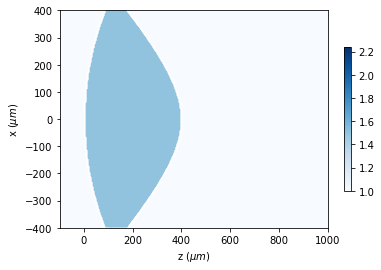

In [26]:
lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds = lens.aspheric_lens(r0=(0 * mm, 0 * mm),
                                  angle=(0 * degrees, (0 * mm, 0 * mm)),
                                  refractive_index=1.5,
                                  cx=(1 / (1 * mm), -1 / (.25 * mm)),
                                  Qx=(0, 0),
                                  a2=(0, 1e-13),
                                  a3=(0, 0),
                                  a4=(0, 0),
                                  depth=.4 * mm,
                                  size=0.8 * mm)

lens.slit(r0=(0, 100 * um),
          aperture=800 * um,
          depth=75 * um,
          refractive_index=1 + 2j)

lens.draw_refractive_index(draw_borders=True,
                           min_incr=0.01,
                           colorbar_kind='vertical')


In [27]:
lens.smooth_refractive_index(type_filter=2, pixels_filtering=15)


Since the computation time of WPM is proportional to the number or refraction indexes at each layer, it is important to discretize the refraction index, with not to many layers.

In [28]:
lens.discretize_refractive_index(num_layers=6)


In [29]:
lens.incident_field(u0)


In [30]:
lens.clear_field()
lens.WPM(has_edges=True, verbose=False)

get_k


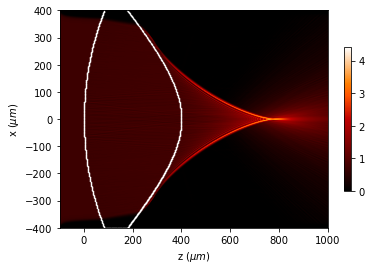

In [31]:
lens.draw(kind='intensity',
          logarithm=1,
          normalize=None,
          draw_borders=True,
          colorbar_kind='vertical')


In [32]:
x_f_wpm, z_f_wpm = lens.search_focus()


x = -0.195 um, z = 767.318 um


**Focusing area**

In [33]:
ylim_max = 25 * um
zlim_max = 100 * um


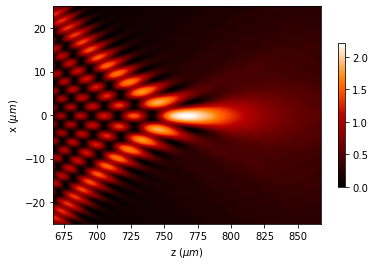

In [34]:
lens.draw(kind='intensity', logarithm=1e-1, colorbar_kind='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_wpm - zlim_max, z_f_wpm + zlim_max)


## XYZ Scheme

In [35]:
from diffractio import np, plt, sp, um, mm, degrees
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ

In [36]:
x = np.linspace(-15 * um, 15 * um, 256)
y = np.linspace(-15 * um, 15 * um, 256)
z = np.linspace(0, 30 * um, 256)
wavelength = 0.6328 * um

In [37]:
t0 = Scalar_mask_XY(x, y, wavelength)
t0.circle(r0=(0, 0), radius=12.5 * um, angle=0)

u0 = Scalar_source_XY(x, y, wavelength)
u0.plane_wave(A=1)

In [38]:
u = Scalar_mask_XYZ(x, y, z, wavelength)
u.sphere(r0=(0, 0, 12.5), radius=10 * um, refractive_index=2, angles=(0, 0, 0))


In [39]:
x = np.linspace(-50 * um, 50 * um, 256)
y = np.linspace(-50 * um, 50 * um, 256)
z = np.linspace(0, 500 * um, 256)
wavelength = .6 * um

In [40]:
t0 = Scalar_mask_XY(x, y, wavelength)
t0.circle(r0=(0, 0), radius=45 * um, angle=0)

In [41]:
u = Scalar_mask_XYZ(x, y, z, wavelength)
u.incident_field(u0=t0)


In [42]:
%%time
u.clear_field()
u.WPM(verbose=True, has_edges=True)

get_k
get_k
Time = 6.20 s, time/loop = 24.23 ms
CPU times: user 6.32 s, sys: 156 ms, total: 6.48 s
Wall time: 6.4 s


<Figure size 432x288 with 0 Axes>

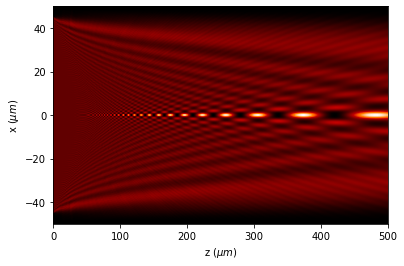

In [43]:
u.draw_XZ(y0=0, logarithm=False)

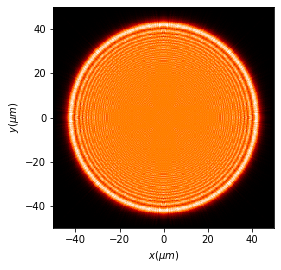

In [44]:
u.draw_XY(z0=20, logarithm=True)